# Problem Set 6 Code

In [333]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits import mplot3d
from scipy import optimize as opt

## Exercise 9.6

In [334]:
def steepdescquad(Q, b, c, x_0, tol=1e-6, maxiter=1000):
    '''
    Function uses the steepest descent method to minimize the quadratic form
    1/2 x^T Q x - b^T x + c.
    Inputs are Q an "nxn", b an "n", c a scalar, and x_0 an "n" initial guess.
    
    Continues
    '''
    Df = lambda x: .5 * x.T @ (Q.T + Q) + b.T #Fix
    norm = 500
    x = x_0
    itr = 0
    while (itr < maxiter) and (norm > tol):
        #print("x beginning:", x)
        alpha = (Df(x) @ Df(x).T) / (Df(x) @ Q @ Df(x).T)
        xnext = x - alpha * Df(x).T
        x = np.copy(xnext)
        itr += 1
        norm = np.linalg.norm(Df(x))
    func = .5 * (x.T @ Q @ x) - b.T @ x + c 
    return x, func
    
    

In [335]:
#test
Q = np.array([[2, 1],[1,2]])

b = np.array([-1, 1])

c = 0

x_0 = np.array([25, 7])

minimizer = steepdescquad(Q, b, c, x_0)
minimizer

(array([ 1.00000022, -1.00000025]), 3.000000942785595)

The function appears to work!

# Exercise  9.7

In [336]:
def Df(f, x, Rerrf):
    '''
    Function computes Df at x using the forward differences method and a 
    step size of sqrt(Rerrf)
    inputs:
    f the function 
    x the point at which Df is evaluated (length n vector)
    Rerrf the maximum relative error of f near x
    
    Note this function only computes gradients - not generalized multidimensional
    derivatives...
    '''
    h = np.sqrt(Rerrf)
    n = x.shape[0]
    #Differentiate
    Df = np.zeros((n))
    for i in range(n):
        xfwd = x.copy()
        xfwd[i] = xfwd[i]+h
        Df[i] = (f(xfwd) - f(x)) / h
    Df
    return Df

In [337]:
#Test
F = np.array([[1., 2.], [3., 4.]])
f = lambda x: (F @ x).T @ (F @ x)
x = np.array([2., 2.])
f(x)
Df(f, x, .01)

array([ 97., 138.])

In [338]:
Df(rosenbrock, np.array([-2.0, 2.0]), 0.01)

array([-1413.8,  -390. ])

Looks good.

# Exercise 9.9 and 9.10

In [429]:
def secant(f, init1, init2, tol=1e-7, fp="none"):
    '''
    inputs are:
        f: a function of one variable x
        init1: an inital guess for x
        init2: a second intial guess for x
        tol: the tolerance
        fp: the analytical derivative of f
    If fp is not given, I will approximate the derivatives at each point.
    
    I use the secant method as outlined in 6.34 to produce a minimum.
    The stopping condition is relative, and we iterate until
    |xk - xkm1| < |xk|ϵ
    '''
    #Initialize variables
    xkm1 = init1
    xk = init2
    xkp1 = 0
    if fp == "none":
        fpxkm1 = (f(xkm1 + 1e-9) - f(xkm1 - 10e-9)) / 2e-9
        fpxk = (f(xk + 1e-9) - f(xk - 10e-9)) / 2e-9
        iter = 0
        reldist = 5
        while (reldist > tol) & (iter < 1000):
            #Calculate next xk
            print('xks from secant: \n xk =', xk, '\n fpxk = ', fpxk, '\n xkm1 =', xkm1, ' \n fpxkm1 =', fpxkm1, '\n')
            xkp1 = xk - fpxk * (xk - xkm1)/(fpxk - fpxkm1)
            #Iterate
            xkm1 = xk
            fpxkm1 = (f(xkm1 + 1e-9) - f(xkm1 - 10e-9)) / 2e-9
            xk = xkp1
            #Calculate next fpxk
            fpxk = (f(xk + 1e-9) - f(xk - 10e-9)) / 2e-9
            reldist = np.abs(xk - xkm1)
            iter += 1
        xmin = xk
        fxmin = f(xmin)
        return xmin, fxmin
    else:
        fpxkm1 = fp(xkm1) 
        fpxk = fp(xk)
        iter = 0
        reldist = 5
        while (reldist > tol) & (iter < 1000):
            #Calculate next xk
            xkp1 = xk - fpxk * (xk - xkm1)/(fpxk - fpxkm1)
            #Iterate
            xkm1 = xk
            fpxkm1 = fp(xkm1)
            xk = xkp1
            #Calculate next fpxk
            fpxk = fp(xk)
            reldist = np.abs(xk - xkm1)
            iter += 1
        xmin = xk
        fxmin = f(xmin)
        return xmin, fxmin

def steepest_descent(f, x_0, eps, h, maxcount):
    '''
    Function computes minimum via steepest descent for arbitrary functions
    f. 
    Inputs:
    f = the function
    x_0 = the initial guess for f
    eps = tolerance for quality of guess
    h = step size
    maxcount = number of times function will attempt iteration before crash
    '''
    # Initialize things
    x_k = x_0
    dist = 50.
    count = 0. 
    while (count < maxcount) & (dist > eps):
        print('x_k:', x_k)
        grad = Df(f, x_k, h)
        print('Direction of steepest descent:', -grad)
        # Find optimal alpha
        #Define a function to minimize
        crit = lambda alpha: f(x_k - alpha * np.dot(grad, np.array(f(x_k))))
        #Initial guess
        guess1, guess2 = .2, .8
        #Use a linesearch method to minmize for alpha
        alphmin, critmin = secant(crit, guess1, guess2)
        alpha = alphmin
        print('Alpha:', alpha, '\n \n ----------------------------------------- \n --------------------------------------- \n' )#,np.dot(grad, np.array(f(x_k))))
        x_kp1 = x_k - alpha * np.dot(grad, np.array(f(x_k)))
        x_k = x_kp1.copy()
        dist = #** RETURN HERE
        
def rosenbrock(vec):
    '''
    Function computes rosenbrock function at vec = x, y
    Used for testing steepest_descent: True min is at (-2, 2)
    '''
    x, y = vec[0], vec[1]
    out = 100 * (y - x**2) **2 + (1 - x)**2
    return out

In [431]:
v_init = np.array([-2.0, 2.0])
steepest_descent(rosenbrock, v_init, .001, .0000005, 100)

x_k: [-2.  2.]
Direction of steepest descent: [1604.5854793   399.92928932]
xks from secant: 
 xk = 0.8 
 fpxk =  2.089450184114176e+26 
 xkm1 = 0.2  
 fpxkm1 = 3.264646863650816e+24 

xks from secant: 
 xk = 0.19047654327221208 
 fpxk =  2.820133529583616e+24 
 xkm1 = 0.8  
 fpxkm1 = 2.089450184114176e+26 

xks from secant: 
 xk = 0.1821372418900856 
 fpxk =  2.46570104651776e+24 
 xkm1 = 0.19047654327221208  
 fpxkm1 = 2.820133529583616e+24 

xks from secant: 
 xk = 0.12412273947407626 
 fpxk =  7.80346290864128e+23 
 xkm1 = 0.1821372418900856  
 fpxkm1 = 2.46570104651776e+24 

xks from secant: 
 xk = 0.09726109409953715 
 fpxk =  3.75440713711616e+23 
 xkm1 = 0.12412273947407626  
 fpxkm1 = 7.80346290864128e+23 

xks from secant: 
 xk = 0.07235416300264419 
 fpxk =  1.54560863993856e+23 
 xkm1 = 0.09726109409953715  
 fpxkm1 = 3.75440713711616e+23 

xks from secant: 
 xk = 0.05492551663816017 
 fpxk =  6.761030451199999e+22 
 xkm1 = 0.07235416300264419  
 fpxkm1 = 1.54560863993856e+

 fpxk =  -1.3010426069826053e-09 
 xkm1 = 0.018692099715593602  
 fpxkm1 = -5.204170427930421e-09 

xks from secant: 
 xk = 0.018692558607602067 
 fpxk =  -4.7704895589362195e-09 
 xkm1 = 0.018692443884599952  
 fpxkm1 = -1.3010426069826053e-09 

xks from secant: 
 xk = 0.018692400863474158 
 fpxk =  -6.505213034913027e-09 
 xkm1 = 0.018692558607602067  
 fpxkm1 = -4.7704895589362195e-09 

xks from secant: 
 xk = 0.018692992403953817 
 fpxk =  4.336808689942017e-10 
 xkm1 = 0.018692400863474158  
 fpxkm1 = -6.505213034913027e-09 

Alpha: 0.01869295543267384 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [0.91888595 0.84393262]
Direction of steepest descent: [-0.23146321  0.01304429]
xks from secant: 
 xk = 0.8 
 fpxk =  0.007399521100015515 
 xkm1 = 0.2  
 fpxkm1 = 0.0018751376319736666 

xks from secant: 
 xk = -0.0036575820076069077 
 fpxk =  -3.6455213847652597e-06 
 xkm1 = 0.8  
 fpxkm1 = 0.007399521100015515 

xks from secant: 
 xk =

 xkm1 = 0.8  
 fpxkm1 = 0.00760896944410061 

xks from secant: 
 xk = 1.0107854868623674e-06 
 fpxk =  1.0408340855860843e-08 
 xkm1 = -0.0003893885647617834  
 fpxkm1 = -3.713175600328355e-06 

xks from secant: 
 xk = -8.04775466768242e-08 
 fpxk =  0.0 
 xkm1 = 1.0107854868623674e-06  
 fpxkm1 = 1.0408340855860843e-08 

Alpha: -8.04775466768242e-08 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [0.91889021 0.84393239]
Direction of steepest descent: [-0.23443597  0.01465502]
xks from secant: 
 xk = 0.8 
 fpxk =  0.007608898754118964 
 xkm1 = 0.2  
 fpxkm1 = 0.001905020412251712 

xks from secant: 
 xk = -0.00039211547714135264 
 fpxk =  -3.736160686385048e-06 
 xkm1 = 0.8  
 fpxkm1 = 0.007608898754118964 

xks from secant: 
 xk = 7.043006365653644e-07 
 fpxk =  1.1709383462843448e-08 
 xkm1 = -0.00039211547714135264  
 fpxkm1 = -3.736160686385048e-06 

xks from secant: 
 xk = -5.22977076927321e-07 
 fpxk =  -9.540979117872439e-09 
 xkm1 

C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\mattd\Anaconda3\lib\site-packages\ipykernel_launcher.py:96: RuntimeWarning: invalid value encountered in double_scalars


0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------


Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 

 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ---------------------

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 ---------------------

 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------


Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 

 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 -----

Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  n

 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 -----------------------------------

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 

 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 -----------------------------------


Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------

 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ----------------------------------------- 
 --------------------------------------- 

x_k: [nan nan]
Direction of steepest descent: [nan nan]
xks from secant: 
 xk = 0.8 
 fpxk =  nan 
 xkm1 = 0.2  
 fpxkm1 = nan 

Alpha: nan 
 
 ---------------------

KeyboardInterrupt: 

My function is able to get me pretty close to the "correct" value for x (see the above printouf which I was using for debugging purposes) but then the secant function I wrote a couple weeks ago explodes. I think my 'gradient descent' function (though incomplete) is good, though.

Some scratch work I was using to visualize below.

[134.51568158   8.7971155 ]


(1, 0)

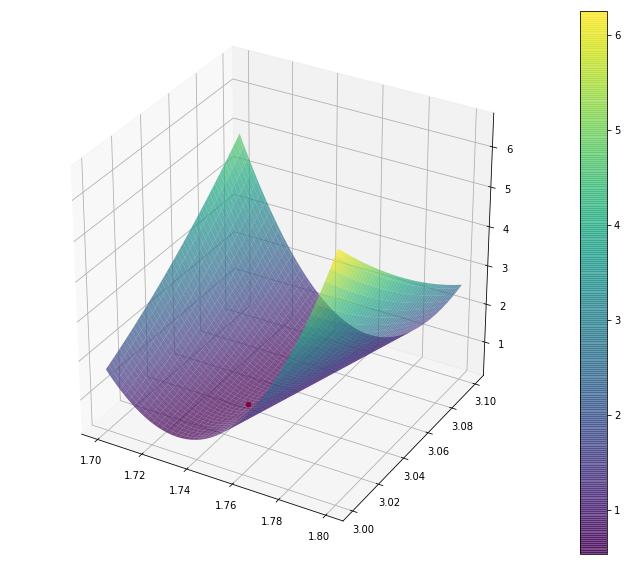

In [378]:
v_init = np.array([1.74315, 3.0325575])
print(Df(rosenbrock, v_init, .01))

fig = plt.figure(figsize = (12, 10))
ax = plt.axes(projection='3d')

Xgrid = np.linspace(1.7, 1.8, 100)
Ygrid = np.linspace(3., 3.1, 100)
X, Y = np.meshgrid(Xgrid, Ygrid)
Z = rosenbrock(np.array([X, Y]))
p = ax.plot_surface(X, Y, Z, cmap=plt.cm.viridis, alpha = .7)
fig.colorbar(p)
ax.scatter(np.array(v_init[0]), np.array(v_init[1]), np.array(rosenbrock(v_init)), c = 'r')
#ax.plot()

rosenbrock([0, 0]), rosenbrock([1, 1])